In [1]:
from graph_utils import *

In [2]:
people = pd.read_csv("data/SDFB/people.csv")
relations = pd.read_csv("data/SDFB/relations.csv")

/var/folders/vb/kwlfq17j5c91v6twzjz7s1n80000gn/T/ipykernel_85650/2453539770.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  relations = pd.read_csv("data/SDFB/relations.csv")


In [3]:
people = people[["id", "display_name"]]
relations = relations[["id", "person1_index", "person2_index"]]

In [4]:
people.head()

,id,display_name
0,10000023,John Abercromby
1,10010033,Valentine Pyne
2,10004750,John Gedde
3,10000006,Tomas ab Ieuan ap Rhys
4,10000007,Maredudd ab Ieuan ap Robert


In [5]:
relations.head(10)

,id,person1_index,person2_index
0,100047969,10002248,10002250
1,100201025,10002157,10001533
2,100200986,10050002,10000252
3,100093295,10004588,10013294
4,100201027,10008901,10001903
5,100201026,10008901,10008908
6,100109759,10005664,10008901
7,100079104,10003747,10005852
8,100200997,10054987,10006957
9,100200987,10054978,10054684


In [6]:
relations_names = pd.DataFrame(columns=["P1", "P2"])

In [7]:
for i in range(10):
    p1, p2 = relations.iloc[i]["person1_index"], relations.iloc[i]["person2_index"]
    print(people[people["id"] == p1]["display_name"].values[0])

Mildred Cecil
John Carver
Barbara Apsley
Sir Martin Frobisher
George North
George North
Sir Christopher Hatton
Robert Dudley
Joan Kingston
Richard Oulton


In [8]:
people_arr = people.id.values
people_arr = np.sort(people_arr, axis=None)

## Ordinary directed graph 

One of the assumptions that is being made is that if p1 has relation with p2 it doesn't imply that p2 has relation with p1

In [9]:
#  let's build a graph
graph = {}
for i in range(relations.shape[0]):
    p1, p2 = relations.iloc[i]["person1_index"], relations.iloc[i]["person2_index"]
    if not p1 in graph.keys():
        graph[p1] = [p2]
    else:
        graph[p1].append(p2)

In [10]:
nodes_degree = np.array([])
for key, value in graph.items():
    nodes_degree = np.append(nodes_degree, len(value))

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

(0.0, 100.0)

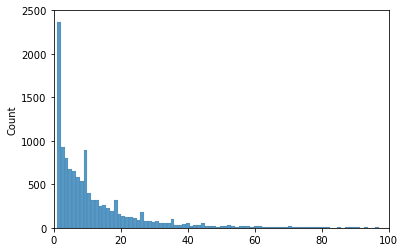

In [12]:
sns.histplot(data=nodes_degree)
plt.ylim((0, 2500))
plt.xlim((0, 100))

In [69]:
custom_hist = {}
for key, value in graph.items():
    if len(value) in custom_hist.keys():
        custom_hist[len(value)] += 1
    else:
        custom_hist[len(value)] = 1

In [70]:
double_log = []
for key, value in custom_hist.items():
    double_log.append([np.log(key), np.log(value)])

<AxesSubplot:>

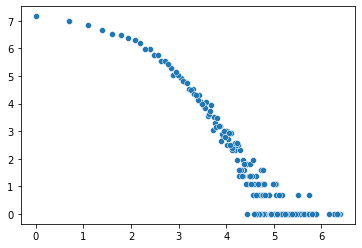

In [81]:
double_log = np.array(double_log)
sns.scatterplot(x=double_log.T[0], y=double_log.T[1])

Now let's perform a hypothesis test <br>
$H_0:$ the sample doesn't follow the power-law distribution <br>
$H_1:$ the sample follows the power-law distribution

In [15]:
N_DATASETS = 3000 #the number of datasets if heuristically defined as 1/4 * eps^-2

In [55]:
from scipy.stats import pareto
from scipy.stats import ks_2samp

In [48]:
def estimate_alpha(x:np.ndarray, xmin: int) -> float: 
    return len(x) / int(sum(np.log(x / xmin - 0.5))) + 1

In [50]:
alpha_hat = estimate_alpha(nodes_degree, 1)

In [60]:
p_vals = []
for i in range(N_DATASETS):
    sample = pareto.rvs(alpha_hat, size=len(nodes_degree))
    p_vals.append(ks_2samp(sample, nodes_degree)[1])